# 11. Linear Regression

In [1]:
# Importing Library

import numpy as np
import matplotlib.pyplot as plt

# no_x: number of data
no_x = 100

# generate 1D variable x and target y x = np.linspace(0, 1, no_x)
# eps= level of random noise.
# You can change eps value, if you want

x = np.linspace(0, 1, no_x)
eps = 0.2 #random noise
y = 1 + x + eps * np.random.random(size=len(x))

# compute matrix X and vector y
X = np.column_stack((np.ones(len(x)), x))  
y = y.reshape(-1  , 1)

# Compute the normal equation to find w = [w0, w1]
XtX = X.T.dot(X)        
Xty = X.T.dot(y)        
w = np.linalg.inv(XtX).dot(Xty)

#Intercept & Slope
w0, w1 = w
print(f"w0: {w0}, w1: {w1}") 

w0: [1.09211427], w1: [1.01420417]


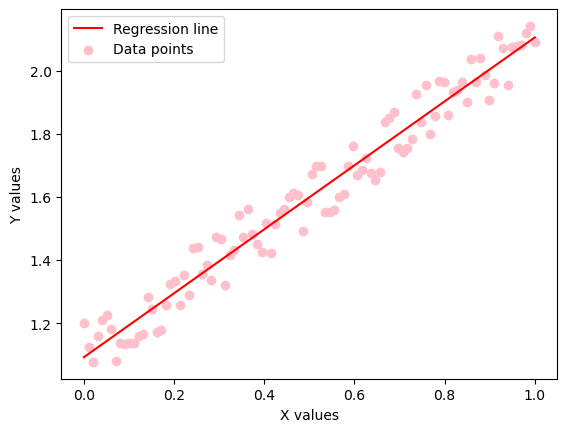

Predicted value for x=0.8: 1.9035


In [2]:
# Plot the data points and the linear regression line
plt.scatter(x, y, color='pink', label='Data points')
plt.plot(x, w0 + w1 * x, color='red', label='Regression line')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
plt.show()

# Given a value of x=0.8, predict y value
x_predict = 0.8
y_predict = w0 + w1 * x_predict
print(f"Predicted value for x=0.8: {y_predict[0]:.4f}")

In [3]:
# 2. Implement linear regression using sklearn library

from sklearn.linear_model import LinearRegression

# Reshape
x_sklearn = x.reshape(-1, 1)

# Fitting the model
model = LinearRegression()
model.fit(x_sklearn, y)

# Intercept & Slope
print(f"Sklearn Intercept: {model.intercept_[0]:.4f}")
print(f"Sklearn Slope: {model.coef_[0][0]:.4f}") 

# Sklearn predicted value
y_predict_sklearn = model.predict([[0.8]])
print(f"Sklearn predicted value for x=0.8: {y_predict_sklearn[0][0]:.4f}")

Sklearn Intercept: 1.0921
Sklearn Slope: 1.0142
Sklearn predicted value for x=0.8: 1.9035


The manually computed intercept and slope and the sklearn intercept and slope are same because both methods are performing the same core operation fitting in linear regression model using the least squares method.

# 12. Logistic Regression

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Hyperparameters
alpha = 0.01
num_iter = 1000
# You can change num_iter value num_iter = 1000
# Create dataset
X, y = make_classification(
n_samples=100, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1 )

def add_ones(X):
    ones = np.ones((X.shape[0], 1))
    return np.hstack((ones, X))  

def comp_p(X, w):
    return 1/(1 + np.exp(-X.dot(w)))  
    # Sigmoid function

# given X and w, compute p1(x; w)
X_1 = add_ones(X)
w = np.zeros(X_1.shape[1])
m = y.size

for i in range(num_iter):
    p1 = comp_p(X_1, w)  
    gradient = X_1.T.dot(y - p1)/m 
    w = w + (alpha * gradient)
    
# compute prediction probabilities using the coefficients w
p1_final = comp_p(X_1, w)

predictions = (p1_final >= 0.5).astype(int)

# Accuracy Calculation
accuracy = np.mean(predictions == y)
print("Accuracy: " + str(accuracy))

Accuracy: 1.0


In [5]:
# 2
#modify 12-(C) using L2 regularization term
lambda_param = 0.01 

for i in range(num_iter):
    p1 = comp_p(X_1, w)
    gradient = X_1.T.dot(y - p1)/m - (lambda_param * w) 
    w = w + (alpha * gradient) 
    
#Repeat 12D
p = comp_p(X_1, w)
predictions_new = (p >= 0.5).astype(int)

# Accuracy Calculation
accuracy_l2 = np.mean(predictions_new == y)
print("Accuracy of L2 regularization: " + str(accuracy))

Accuracy of L2 regularization: 1.0


In [6]:
# 3
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [7]:
# logistic regression
model = LogisticRegression()
model.fit(X_1, y)

sklearn_predictions = model.predict(X_1)

# Accuracy Calculation
sklearn_accuracy = accuracy_score(y, sklearn_predictions)
print("Sklearn accuracy: " + str(accuracy))

Sklearn accuracy: 1.0


# 13. Correlaton analysis in Feature Selecton

In [8]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

# Loading breast cancer data
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)

c_matrix = df.corr()
c_target = c_matrix['target'].drop('target')
sort_c = c_target.sort_values(ascending=False)

features = sort_c.head(10)
print(features)

smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
Name: target, dtype: float64


# 14. PCA - Principal Component Analysis

In [9]:
import pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading iris dataset
data = pandas.read_csv("/Users/anan/Desktop/iris.csv")

# X: input features
X = data.iloc[:,0:4]
# Y: target
Y = data.iloc[:,4]

# compute covariance matrix of X (refer to p. 21)
# compute eigen values and eigen vector (hint: use np.linalg.eigh)
# choose TWO largest eigen values and their corresponding eigen vectors # eigvec_set: two eigen vectors
# Visualization of PCA
# compute projected data pca_X (dimension reduced from 4 to 2)
# Compute eigenvalues and eigenvectors

c_matrix = np.cov(X, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(c_matrix)

sort_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sort_idx]
eigenvectors = eigenvectors[:,sort_idx]

e_set = eigenvectors[:, :2]

print("Covariance Matrix:\n", c_matrix)
print("Eigenvalues:\n", eigenvalues)
print("Top 2 Eigenvectors:\n", e_set)

Covariance Matrix:
 [[ 0.68656811 -0.0372787   1.27036233  0.51534691]
 [-0.0372787   0.18792128 -0.31673091 -0.11574868]
 [ 1.27036233 -0.31673091  3.09637221  1.28912434]
 [ 0.51534691 -0.11574868  1.28912434  0.57956557]]
Eigenvalues:
 [4.20438706 0.24314579 0.07905128 0.02384304]
Top 2 Eigenvectors:
 [[-0.36263433  0.6558202 ]
 [ 0.08122848  0.73001455]
 [-0.85629752 -0.17703033]
 [-0.35868209 -0.07509244]]


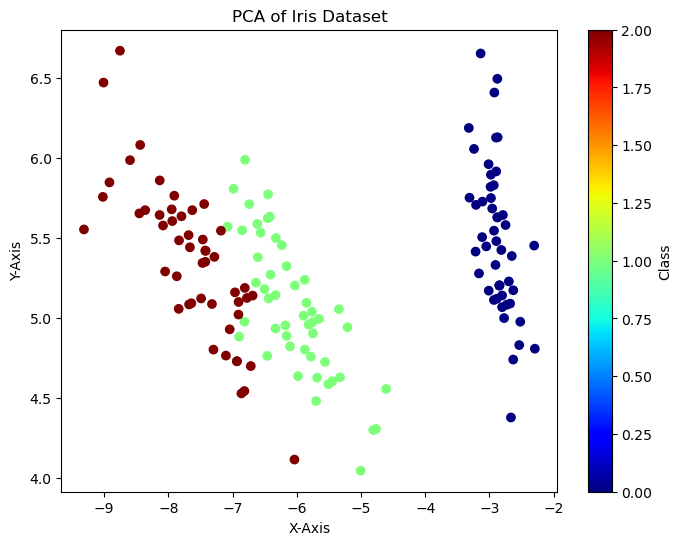

In [10]:
# Visualization of PCA in plot
pca_X = np.dot(e_set.transpose(), X.transpose()).transpose()
plt.figure(figsize=(8, 6))
plt.scatter(pca_X[:, 0], pca_X[:, 1], c = pd.factorize(Y)[0], cmap='jet')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.title('PCA of Iris Dataset')
plt.colorbar(label='Class')
plt.show()

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)  
pca_X_sklearn = pca.fit_transform(X)

#sklearn ration
explained_variance = pca.explained_variance_ratio_ * 100
print("Explained variance ratio:", explained_variance)

Explained variance ratio: [92.39543681  5.34336193]
